# Titanic - Machine Learning from Disaster

The aim of the competition is using machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

### Metric
Your score is the percentage of passengers you correctly predict. This is known as accuracy.

### Data Dictionary
Variable	Definition	Key

survival -	Survival	0 = No, 1 = Yes

pclass -	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex - Sex	

Age -	Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch -	# of parents / children aboard the Titanic	

ticket -	Ticket number	

fare -	Passenger fare	

cabin -	Cabin number	

embarked -	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### first step is importing our data

our dataset was obtained from kaggle: https://www.kaggle.com/c/titanic/data

In [2]:
df=pd.read_csv("train.csv",index_col="PassengerId")
df_test=pd.read_csv("train.csv",index_col="PassengerId")

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

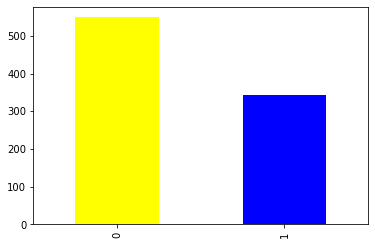

In [7]:
df.Survived.value_counts().plot(kind="bar",color=["yellow","blue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df_test.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
pd.crosstab(df.Survived,df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


Text(0, 0.5, 'number of people')

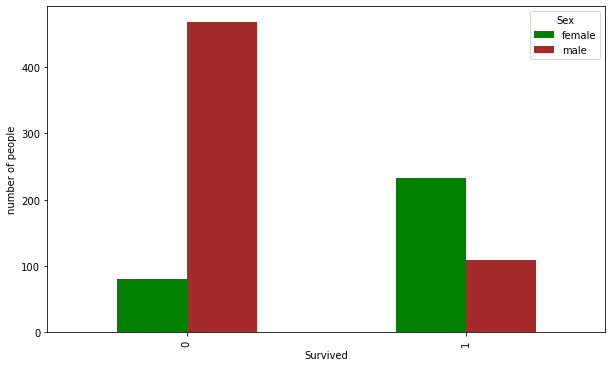

In [13]:
pd.crosstab(df.Survived,df.Sex).plot(kind="bar",figsize=(10,6),color=["green","brown"]);

plt.ylabel("number of people")

In [14]:
df_num=df[["Age","SibSp","Parch","Fare"]]
df_cat=df[["Survived","Pclass","Sex","Ticket","Cabin","Embarked"]]

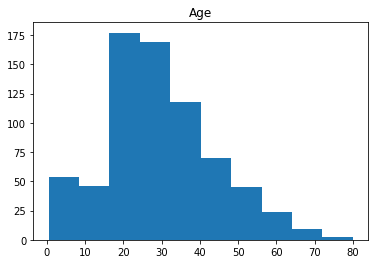

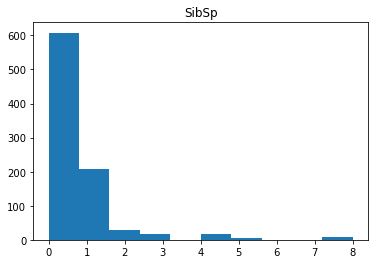

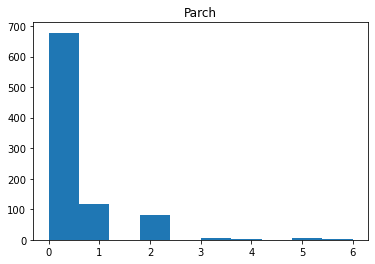

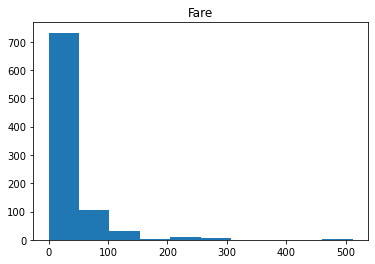

In [15]:
for i in df_num:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

the code in the three cells above was gotten from KenJees youtube video. it's a nice and way to explore different categories of the dataset.

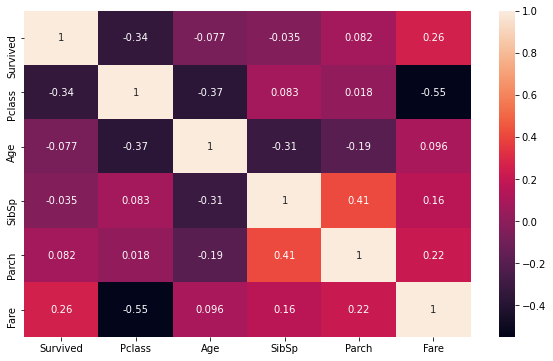

In [16]:
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,annot=True)



we need to handle the missing values so we can create and fit our model. we'll also drop a few columns and work with the ones we believe affect the chances of survival.

In [17]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
df["Age"]=df["Age"].fillna(df["Age"].mean()).astype(int)

In [19]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#df["Embarked"]=df["Embarked"].map({"S":0,"C":1,"Q":2})

In [21]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

next we make the same changes to the test dataset

In [22]:
df_test["Age"]=df_test["Age"].fillna(df_test["Age"].mean()).astype(int)

In [23]:
#df_test["Embarked"]=df_test["Embarked"].fillna("S",inplace=True)

In [24]:
df_test.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
features=["Age","Sex","Pclass","SibSp","Parch","Survived"]#dropped fare,embarked
new_data=df[features]


In [26]:
new_data

,Age,Sex,Pclass,SibSp,Parch,Survived
PassengerId,,,,,,
1,22,male,3,1,0,0
2,38,female,1,1,0,1
3,26,female,3,0,0,1
4,35,female,1,1,0,1
5,35,male,3,0,0,0
...,...,...,...,...,...,...
887,27,male,2,0,0,0
888,19,female,1,0,0,1
889,29,female,3,1,2,0


In [27]:
new_df=pd.get_dummies(new_data)
new_df

,Age,Pclass,SibSp,Parch,Survived,Sex_female,Sex_male
PassengerId,,,,,,,
1,22,3,1,0,0,0,1
2,38,1,1,0,1,1,0
3,26,3,0,0,1,1,0
4,35,1,1,0,1,1,0
5,35,3,0,0,0,0,1
...,...,...,...,...,...,...,...
887,27,2,0,0,0,0,1
888,19,1,0,0,1,1,0
889,29,3,1,2,0,1,0


In [28]:
X=new_df.drop("Survived",axis=1)
y=new_df["Survived"]

In [29]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [30]:
model=RandomForestClassifier()



In [31]:
np.random.seed(42)
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
model.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [712, 179]

In [ ]:
X_train.isna().sum()